# Lab 3 Report
Jasmine Soh, Pamel Kang, Kevin Liaw

In [11]:
# import cell
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
import simpleaudio as sa

# Summary
In the first assignment, we used the numpy fft and fftshift function to take the Fourier Transform of a signal. We then graphed it and identified where the peaks were using a threshold value. In assignment 2 we wrote a function called classify that woud calculate the Fourier Transform and identify the component frequencies that correspond to touch-tone digits. Lastly, we tested the function by reading in a CSV file. 

# Assignment 1 -- Identifying Constituent Frequencies of a Signal

<IPython.core.display.Javascript object>


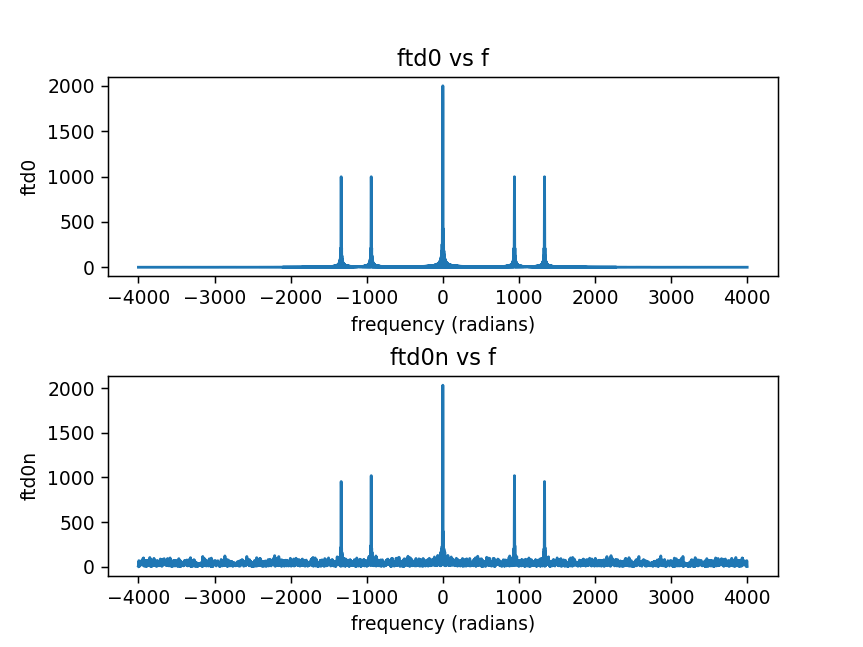

positive frequencies (Hz):
1.0
2.0
941.0
1336.0


Text(0, 0.5, 'ftd0n')

In [12]:
# Assignment 1: Identifying Constituent Frequencies of a Signal

# Part A
# TODO: creating d0 signal
fs = 8000
t = np.arange(0,0.25,1/fs)
d0 = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)

# Part B
# TODO: write wav file where d0 is played twice with 0.5 second pause in between
pause = np.zeros(int(0.5*fs))
d0_amplified = 50*d0
wav.write("d0.wav",fs,d0_amplified.astype("int16"))
fs, data = wav.read('d0.wav')
d0_audio = np.concatenate([data,pause,data]).astype("int16")
play_obj = sa.play_buffer(d0_audio,1,2,fs)
play_obj.wait_done()

# Part C
# TODO: plot magnitude of Fourier Transform in frequency domain
ftd0 = np.fft.fft(d0,fs)
ftd0 = np.fft.fftshift(ftd0)
f = np.arange(-fs/2, fs/2)

fig1 = plt.figure(2)
fig1.subplots_adjust(hspace=0.5,wspace=0.5)

plt.subplot(2,1,1)
plt.plot(f,np.abs(ftd0))
plt.title("ftd0 vs f")
plt.xlabel("frequency (radians)")
plt.ylabel("ftd0")

# Part D
# TODO: print positive frequency associated with peak in Fourier Transform
ind = np.arange(len(ftd0))
peak_ind = f[np.abs(ftd0)[ind] > 900] # finding frequencies associated with peaks
#peak_ind = peak_ind / (2*np.pi)

print("positive frequencies (Hz):")
#for i in b:
for i in peak_ind:
    if i > 0:
        print(i)
        
# Part E
# TODO: concatenate random noise and d0; compute and plot Fourier Transform
n = np.random.normal(0,1,len(d0))
d0n = np.concatenate([d0,n])
ftd0n = np.fft.fft(d0n,fs)
ftd0n = np.fft.fftshift(ftd0n)

plt.subplot(2,1,2)
plt.plot(f,np.abs(ftd0n))
plt.title("ftd0n vs f")
plt.xlabel("frequency (radians)")
plt.ylabel("ftd0n")

## Discussion
A greater value of threshold is needed in order to identify the true peaks. A threshold of 100 would identify more peaks. When looking at the magnitude graph, there are other points besides the peaks that exceed 100. The addition of noise makes the plot less smooth. The addition of a "1" would make add another peak because the Fourier Transorm of 1 is an impulse at frequency 0.

# Assignment 2 -- Classifying Touch-Tone Telephone Signals

In [8]:
# Assignment 2: Classifying Touch-Tone Telephone-Signals
# function cell

# x: tone signal
# fs: sampling rate
# return digit associated with signal
def classify(x,fs):
    N = 4096
    ftdx = np.fft.fft(x,N)
    xfft_abs = np.abs(np.fft.fftshift(ftdx)) # magnitude of shifted DFT of x
    f = np.arange(-fs/2,fs/2)
    ind = np.arange(0,4096)
    index_tone = ind[xfft_abs[ind] > 900] # indices in xfft corresponding to peaks
    freq_tone = f[(index_tone*fs/N).astype(int)] # array of frequencies corresponding to peaks
    #print(freq_tone)
    pos_freq = freq_tone[2:] # last two positive values
    min_e = fs
    for index, i in enumerate(tone_freqs):
        digit_error = (i[0] - pos_freq[0])**2 +(i[1]-pos_freq[1])**2
        if digit_error < min_e:
            min_e = digit_error
            min_e_tone = index
    return min_e_tone
    
tone_freqs = np.array([[941,1336],
                       [697,1209],[697,1336],[697,1477],
                       [770,1209],[770,1336],[770,1477],
                       [852,1209],[852,1336],[852,1477]])

In [9]:
# test cell

# Part B
# TODO: create tone signals and test classify function
t = np.arange(0,0.25, 1/fs)
d0 = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)
d4 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1209*t)
d5 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1336*t)
d8 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1336*t)
d9 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1477*t)

classify(d0,fs)
classify(d4,fs)
classify(d5,fs)
classify(d8,fs)
classify(d9,fs)

9

## Discussion
Ensure high detection accuracy by making sure the threshold value is large enough. Nyquist Theorem says that the highest frequency that can be represented accurately is half of the sampling rate. 

# Assignment 3 -- Decoding a Phone Number from Touch-Tone Signals

In [10]:
# Assignment 3: Decoding a Phone Number from Touch-Tone Signals

# Part A
# TODO: load file
file = open('phonenum.csv','rb')
rm = np.loadtxt(file,delimiter=',')

# Part B
# TODO: Create buffer to store each phone number digit
phone_num = -1*np.ones(11) # vector to store phone numbers

# Part C
# TODO: decode each time slice using a for loop
rm_rows = rm.shape[0]
for i in range(0,len(phone_num)):
    local_data = rm[int(i*(fs/2)):int(i*(fs/2)+(fs/4))]
    phone_num[i] = classify(local_data,fs)
    
print(phone_num)

[1. 8. 0. 0. 7. 8. 6. 1. 0. 0. 0.]


## Discussion
The decode message is: 18007861000. This is the phone number of In-N-Out burgers.